$$
\Large \text{MLP Model with Multiple Hidden Layer and Multiple Nodes}
$$

# Outline

- Imports
- Global Variables
- Activation Functions
  - Hyperbolic Tangent - `tanh`
  - Softmax -`softmax`
- Prime Functions (Derivatives)
  - Hyperbolic Tangent - `fn_act_prime_tanh`
- Loss Functions - `fn_calculate_loss`
- Prediction Functions  - `predict`
- Plot Decision Boundary Function - `plot_decision_boundary`
- Model Building Function - `build_model`
  - Forward Propagation
  - Backpropagation
  - Weight Update
  - Loss Calculation
  - Epochs
- Model Training and Evaluation


In [1]:
###-----------------
### Import Libraries
###-----------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
###----------------
#Global Variables
###----------------


TEST_SIZE = 0.2
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)


N_SAMPLES = 1000
NOISE = 0.2
ALPHA = 0.1
EPOCHS = 1000

# set location of input files and output files
inpDir = '../input'
outDir = '../output'


# Set plotting parameters
params = {
    'figure.figsize': (15,4),
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
}
plt.rcParams.update(params)


CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

Activation Functions

In [3]:
def softmax(z):
    """Returns the softmax of z.

    Args:
        z (float): The value to be transformed. 

    Returns:
        float: The transformed value.
    """
    max_z = np.max(z)
    exp_z = np.exp(z - max_z)
    return exp_z / np.sum(exp_z)


def tanh_act(z):
    """Returns the tanh of z.

    Args:
        z (float): The value to be transformed. 

    Returns:
        float: The transformed value.
    """
    return np.tanh(z)



Derivative of activation function

In [4]:
def fn_act_prime_tanh_act(z):
    """Calculate the derivative of the activation function for the tanh activation function

    Args:
        z (np.array): input to the activation function

    Returns:
        result (np.array): derivative of the activation function
    """
    return 1 - (np.tanh(z) ** 2)


# Unit Test
fn_act_prime_tanh_act([
    np.array([0.0, 0.5, 1.0]),
    np.array([np.inf, -np.inf, 0]),
])

array([[1.        , 0.78644773, 0.41997434],
       [0.        , 0.        , 1.        ]])

Loss Function

In [5]:
def fn_calculate_loss(model, X_l, y_l):
    """Calculate loss function for backpropagation

    Args:
        model (object): model object
        X_l (array): input data matrix
        y_l (array): target data matrix 
    
    
    Returns:    
        loss (float): loss function value   
    """

    W1, W2, W3, W4, W5, b1, b2, b3, b4, b5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5'], model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    m=X_l.shape[0]

    # Layer 1
    z1 = X_l.dot(W1) + b1               #  Aggregation function
    a1 = tanh_act(z1)                       #  Activation function

    # Layer 2
    z2 = a1.dot(W2) + b2               #  Aggregation function
    a2 = tanh_act(z2)                      #  Activation function

    # Laer 3
    z3 = a2.dot(W3) + b3               #  Aggregation function
    a3 = tanh_act(z3)                      #  Activation function

    # Laer 4
    z4 = a3.dot(W4) + b4               #  Aggregation function
    a4 = tanh_act(z4)                      #  Activation function

    # Laer 5
    z5 = a4.dot(W5) + b5               #  Aggregation function
    a5 = softmax(z5)                   #  Activation function

    data_loss  = -(y_l*np.log(a5) + (1-y_l)*np.log(1-a5)).sum()
    return data_loss/m

Predict Function

In [6]:
def predict(model, X_p):
    """Predict the output of the model for a given input
    
    Args:
        model: multilayer perceptron model
        X_t: input data matrix
        
    Returns:
        y_pred: predicted output
    
    """   

    W1, W2, W3, W4, W5, b1, b2, b3, b4, b5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5'], model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    m=X_p.shape[0]

    # Forward propagation
    # Layer 1
    z1 = X_p.dot(W1) + b1              #  Aggregation function
    a1 = tanh_act(z1)                      #  Activation function

    # Layer 2
    z2 = a1.dot(W2) + b2               #  Aggregation function
    a2 = tanh_act(z2)                      #  Activation function

    # Layer 3
    z3 = a2.dot(W3) + b3               #  Aggregation function
    a3 = tanh_act(z3)                      #  Activation function

    # Layer 4
    z4 = a3.dot(W4) + b4               #  Aggregation function
    a4 = tanh_act(z4)                      #  Activation function

    # Layer 5       
    z5 = a4.dot(W5) + b5               #  Aggregation function  
    a5 = softmax(z5)                   #  Activation function
    
    return np.argmax(a5, axis=1)

Plottinng Decision Boundary

In [7]:
def plot_decision_boundary(model, X_tr, X_ts, y_tr, y_ts):
    """Plot the decision boundary for the neural network"""
    dm = 0.05

    # Ensure inputs are NumPy arrays
    X_tr = np.array(X_tr)
    X_ts = np.array(X_ts)
    y_tr = np.array(y_tr)
    y_ts = np.array(y_ts)

    # Minimum and maximum values along each axis
    x_min, x_max = X_tr[:, 0].min(), X_tr[:, 0].max() 
    y_min, y_max = X_tr[:, 1].min(), X_tr[:, 1].max()

    # Generate a grid of points with distance 'dm' using min and max values along each axis
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, dm), 
        np.arange(y_min, y_max, dm)
    )

    XX = np.c_[
        xx.ravel(),
        yy.ravel()
    ]

    y_pred = predict(model, XX)
    
    Z = y_pred.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    scatter_tr = ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr.ravel(), cmap=CMAP, edgecolors='k') 
    scatter_ts = ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts.ravel(), cmap=CMAP, edgecolors='k', marker='s')
    ax.set_title('Decision Boundary')
    plt.show()


Model Building

In [8]:
rng = np.random.default_rng(seed=RANDOM_STATE)

In [9]:
def build_model(params, X_t, y_t, n_epochs=EPOCHS, alpha=ALPHA):
    """Multilayer perceptron model with multiple hidden layers
    """
    loss_hist = {}

    # Getting dimensions
    m = X_t.shape[0]  

    # Initialize weights 
    W1 = rng.random((params[0], params[1]), dtype=np.float32) / np.sqrt(params[0])
    W2 = rng.random((params[1], params[2]), dtype=np.float32) / np.sqrt(params[1])
    W3 = rng.random((params[2], params[3]), dtype=np.float32) / np.sqrt(params[2])
    W4 = rng.random((params[3], params[4]), dtype=np.float32) / np.sqrt(params[3])  
    W5 = rng.random((params[4], params[5]), dtype=np.float32) / np.sqrt(params[4])
 
    # Initialize biases
    b1 = np.zeros((1, params[1]), dtype=np.float32)
    b2 = np.zeros((1, params[2]), dtype=np.float32)
    b3 = np.zeros((1, params[3]), dtype=np.float32) 
    b4 = np.zeros((1, params[4]), dtype=np.float32)
    b5 = np.zeros((1, params[5]), dtype=np.float32)
    
    # Print confirmation
    # print(f"W1: {W1.shape} W2: {W2.shape} W3: {W3.shape} W4: {W4.shape} W5: {W5.shape}")
    # print(f"b1: {b1.shape} b2: {b2.shape} b3: {b3.shape} b4: {b4.shape} b5: {b5.shape}")

    curr_loss = 0
    loss = []
    epoch = [] 
    
    for i in range(n_epochs):
        # Forward propagation
        # Layer 1
        z1 = X_t.dot(W1) + b1               #  Aggregation function
        a1 = tanh_act(z1)                       #  Activation function

        # Layer 2
        z2 = a1.dot(W2) + b2               #  Aggregation function
        a2 = tanh_act(z2)                      #  Activation function

        # Layer 3
        z3 = a2.dot(W3) + b3               #  Aggregation function
        a3 = tanh_act(z3)                      #  Activation function

        # Layer 4
        z4 = a3.dot(W4) + b4               #  Aggregation function
        a4 = tanh_act(z4)                      #  Activation function

        # Layer 5
        z5 = a4.dot(W5) + b5               #  Aggregation function
        a5 = softmax(z5)                   #  Activation function
        
        # Backpropagation at Layer 5
        dz5 = a5 - y_t                     #  y_t should be of shape (1,m)
        dW5 = (a4.T).dot(dz5)              
        assert (dW5.shape == W5.shape), f"Shape of dW5: {dW5.shape} W5: {W5.shape} are not equal!!!"

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert (db5.shape == b5.shape), f"Shape of db5: {db5.shape} b5: {b5.shape} are not equal!!!"

        da4 = dz5.dot(W5.T)
        assert (da4.shape == a4.shape), f"Shape of da4: {da4.shape} a4: {a4.shape} are not equal!!!"

        # Backpropagation at Layer 4
        dz4 = da4*fn_act_prime_tanh_act(z4)
        dW4 = (a3.T).dot(dz4)              
        assert (dW4.shape == W4.shape), f"Shape of dW4: {dW4.shape} W4: {W4.shape} are not equal!!!"

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert (db4.shape == b4.shape), f"Shape of db4: {db4.shape} b4: {b4.shape} are not equal!!!"

        da3 = dz4.dot(W4.T)
        assert (da3.shape == a3.shape), f"Shape of da3: {da3.shape} a3: {a3.shape} are not equal!!!"

        # Backpropagation at Layer 3
        dz3 = da3*fn_act_prime_tanh_act(z3)
        dW3 = (a2.T).dot(dz3)              
        assert (dW3.shape == W3.shape), f"Shape of dW3: {dW3.shape} W3: {W3.shape} are not equal!!!"

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert (db3.shape == b3.shape), f"Shape of db3: {db3.shape} b3: {b3.shape} are not equal!!!"

        da2 = dz3.dot(W3.T)
        assert (da2.shape == a2.shape), f"Shape of da2: {da2.shape} a2: {a2.shape} are not equal!!!"

        # Backpropagation at Layer 2
        dz2 = da2*fn_act_prime_tanh_act(z2)
        dW2 = (a1.T).dot(dz2)              
        assert (dW2.shape == W2.shape), f"Shape of dW2: {dW2.shape} W2: {W2.shape} are not equal!!!"

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (db2.shape == b2.shape), f"Shape of db2: {db2.shape} b2: {b2.shape} are not equal!!!"

        da1 = dz2.dot(W2.T) 
        assert (da1.shape == a1.shape), f"Shape of da1: {da1.shape} a1: {a1.shape} are not equal!!!"

        # Backpropagation at Layer 1
        dz1 = da1*fn_act_prime_tanh_act(z1)
        assert (dz1.shape == z1.shape), f"Shape of dz1: {dz1.shape} z1: {z1.shape} are not equal!!!"

        dW1 = (X_t.T).dot(dz1)
        assert (dW1.shape == W1.shape), f"Shape of dW1: {dW1.shape} W1: {W1.shape} are not equal!!!"

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (db1.shape == b1.shape), f"Shape of db1: {db1.shape} b1: {b1.shape} are not equal!!!"

        print('alpha: ',alpha)
        # Update Gradient weights
        W1 = W1 - alpha*dW1/m
        W2 = W2 - alpha*dW2/m
        W3 = W3 - alpha*dW3/m
        W4 = W4 - alpha*dW4/m
        W5 = W5 - alpha*dW5/m
        b1 = b1 - alpha*db1/m
        b2 = b2 - alpha*db2/m
        b3 = b3 - alpha*db3/m
        b4 = b4 - alpha*db4/m
        b5 = b5 - alpha*db5/m

        model = {
            'W1': W1,'W2': W2,'W3': W3,'W4': W4,'W5': W5,
            'b1': b1,'b2': b2,'b3': b3,'b4': b4,'b5': b5,   
        }

        if (i+1)%10==0:
            print(model)
            curr_loss = fn_calculate_loss(model, X_t, y_t)
            loss.append(curr_loss)
            epoch.append(i)

            if (i+1)%100==0:
                print(f"Epoch: {i+1} Loss: {curr_loss:>0.5f}")

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model, loss_hist

---
$$
\textbf{Make Moon Dataset}
$$

In [10]:
X, y = datasets.make_moons(
    n_samples=N_SAMPLES,
    noise=NOISE, 
    random_state=RANDOM_STATE, 
    shuffle=True
)

X.shape, y.shape


((1000, 2), (1000,))

In [11]:
df = pd.DataFrame(X, columns=["X_1", "X_2"])
df["target"] = y
df.head()

,X_1,X_2,target
0,2.086144,0.574014,1
1,1.804609,0.006960,1
2,-0.227112,0.573910,0
3,-0.251226,0.187682,1
4,0.425744,-0.414247,1


<Figure size 1500x400 with 0 Axes>

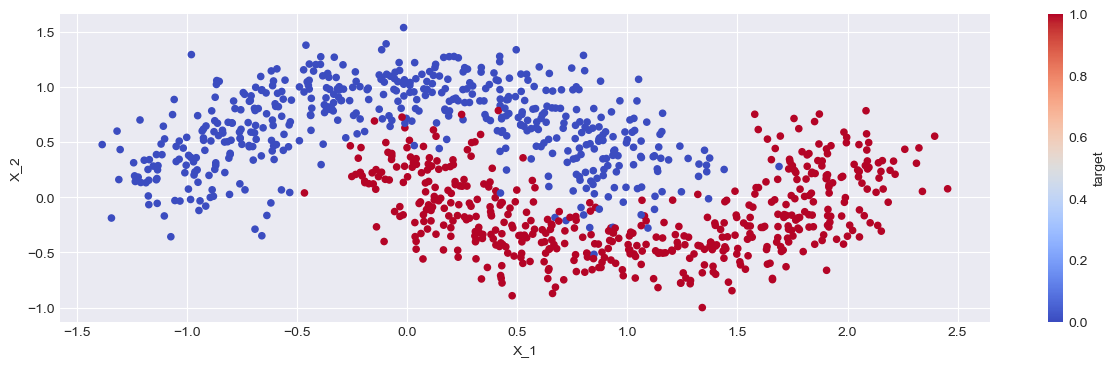

In [12]:
plt.figure()
df.plot.scatter(x="X_1", y="X_2", c="target", cmap=CMAP)
plt.show() 

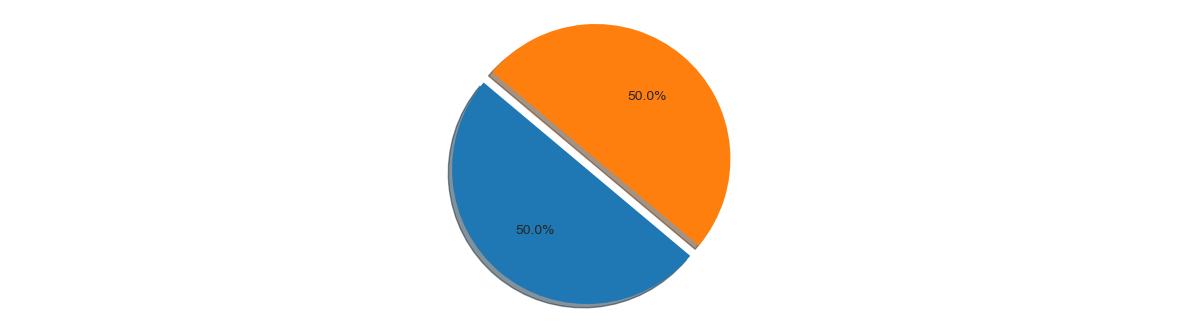

In [13]:
fix, axis = plt.subplots()
explode = (0, 0.1,) # only "explode" the 2nd ring
axis.pie(
    df['target'].value_counts(), 
    explode=explode, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140
)
axis.axis('equal') 
plt.show()

In [14]:
features_df = df.drop('target', axis=1)
labels_df = df['target'].to_numpy()

In [15]:
labels_df = pd.get_dummies(labels_df).to_numpy()            # Gettiong number of catrgories

X_train, X_test, y_train, y_test = train_test_split(
    features_df,
    labels_df,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=labels_df
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
loss_hist = {}
layer_param = [X_train.shape[1], 5,5,4,3,y_train.shape[1]]

model, loss_hist = build_model(
    params=layer_param,
    X_t=X_train.to_numpy(),
    y_t=y_train,
    n_epochs=EPOCHS,
    alpha=ALPHA,
    
)

alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
alpha:  0.1
{'W1': array([[0.57988681, 0.43137615, 0.35495834, 0.18031435, 0.21272539],
       [0.09391976, 0.11627659, 0.0452077 , 0.17942224, 0.60325212]]), 'W2': array([[0.29708768, 0.41465673, 0.23370146, 0.28378309, 0.44429247],
       [0.3353497 , 0.29078628, 0.25339382, 0.26629435, 0.43298043],
       [0.12797365, 0.36876543, 0.30525525, 0.00886334, 0.18208786],
       [0.3965392 , 0.25840323, 0.02803779, 0.36322794, 0.34906752],
       [0.40027928, 0.09605671, 0.06143224, 0.4205162 , 0.05026271]]), 'W3': array([[0.29038979, 0.10247904, 0.17492955, 0.25103249],
       [0.22438563, 0.23162224, 0.0416251 , 0.02803541],
       [0.08204906, 0.04186989, 0.32161095, 0.25433201],
       [0.34030801, 0.18386068, 0.31872793, 0.37992984],
       [0.21600265, 0.26860982, 0.4828307 , 0.39276878]]), 'W4': array([[0.56566589, 0.27430958, 0.41116884],
       [0.53688599, 0.39488255, 0.47

In [18]:
model

{'W1': array([[0.41975097, 0.28242613, 0.28203124, 0.07185508, 0.1411673 ],
        [0.17431897, 0.1910894 , 0.09210772, 0.23685453, 0.63266565]]),
 'W2': array([[0.33668028, 0.45039056, 0.28476024, 0.33495906, 0.48448754],
        [0.38818195, 0.3375184 , 0.31628307, 0.33419418, 0.49463831],
        [0.15021465, 0.38882296, 0.3351758 , 0.03791855, 0.20261019],
        [0.46481856, 0.31792396, 0.1035952 , 0.45055169, 0.43849067],
        [0.45590823, 0.14743265, 0.12729586, 0.49140604, 0.12721329]]),
 'W3': array([[0.48373162, 0.3331133 , 0.34997995, 0.4257665 ],
        [0.38725182, 0.42712188, 0.18811785, 0.17563037],
        [0.22243536, 0.20935775, 0.44806396, 0.38188741],
        [0.54783466, 0.43025478, 0.50705496, 0.56729168],
        [0.42290531, 0.51502763, 0.66983146, 0.57969558]]),
 'W4': array([[1.26411916, 1.12437271, 1.22459573],
        [1.22860989, 1.2334648 , 1.28001045],
        [1.12349964, 1.29505526, 1.08461938],
        [1.21128671, 1.00279799, 1.1719035 ]]),
 'W5

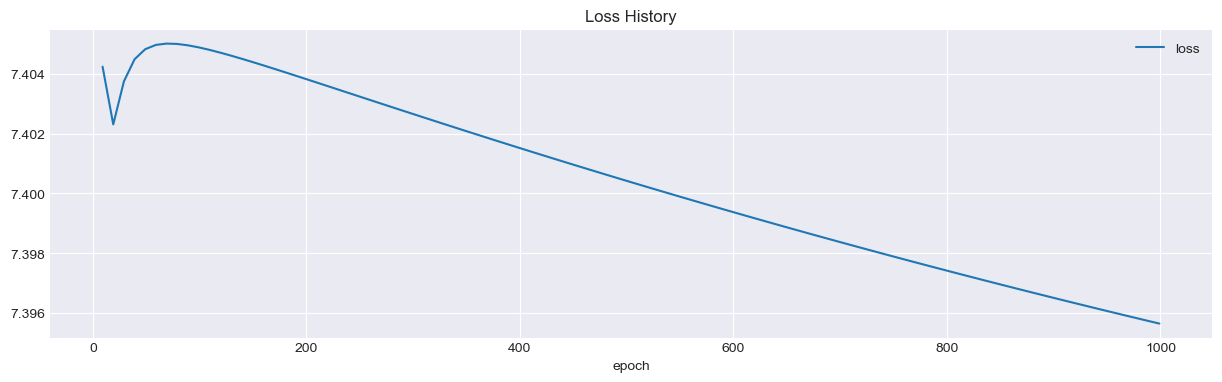

In [19]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss', title='Loss History')
plt.show()

In [20]:
def confusion_mattrix_accuracy_opt(model, X_m, y_m):
    """Returns confusion matrix and accuracy of the model

    Args:
        wts (array): weights of the model       
        X (array): input data

    Returns:
        confusion matrix and accuracy of the model
    """ 
    y_pred = predict(model, X_m)

    y_pred = np.array(y_pred)
    cm = confusion_matrix(y_true=y_m.argmax(axis=1), y_pred=y_pred)
    acc = accuracy_score(y_true=y_m.argmax(axis=1), y_pred=y_pred)
    
    return cm, acc

c:\Users\DAI.STUDENTSDC\.conda\envs\pythonProject\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


'Accuracy score is 0.50375'

,0,1
0,132,268
1,129,271


<Figure size 1000x1000 with 0 Axes>

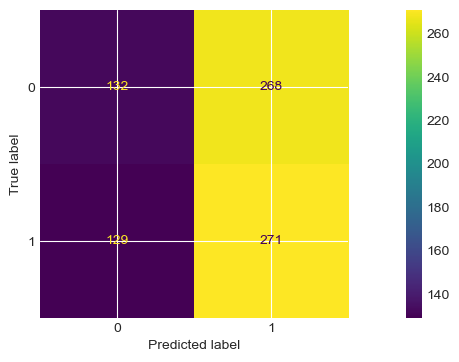

In [21]:
cm, acc = confusion_mattrix_accuracy_opt(model, X_train,y_train)
display(f'Accuracy score is {acc}')
display(pd.DataFrame(cm))    


plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
)
disp.plot()
plt.show()  


c:\Users\DAI.STUDENTSDC\.conda\envs\pythonProject\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


'Accuracy score is 0.42'

,0,1
0,24,76
1,40,60


<Figure size 1000x1000 with 0 Axes>

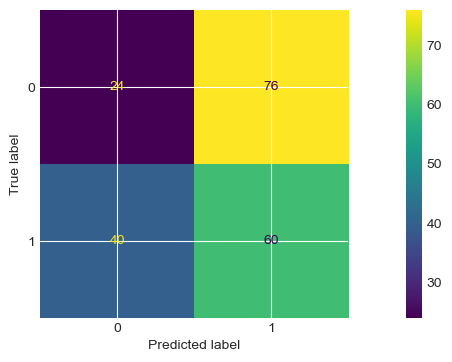

In [22]:
cm, acc = confusion_mattrix_accuracy_opt(model, X_test,y_test)
display(f'Accuracy score is {acc}')
display(pd.DataFrame(cm))    

plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
)
disp.plot()
plt.show()  


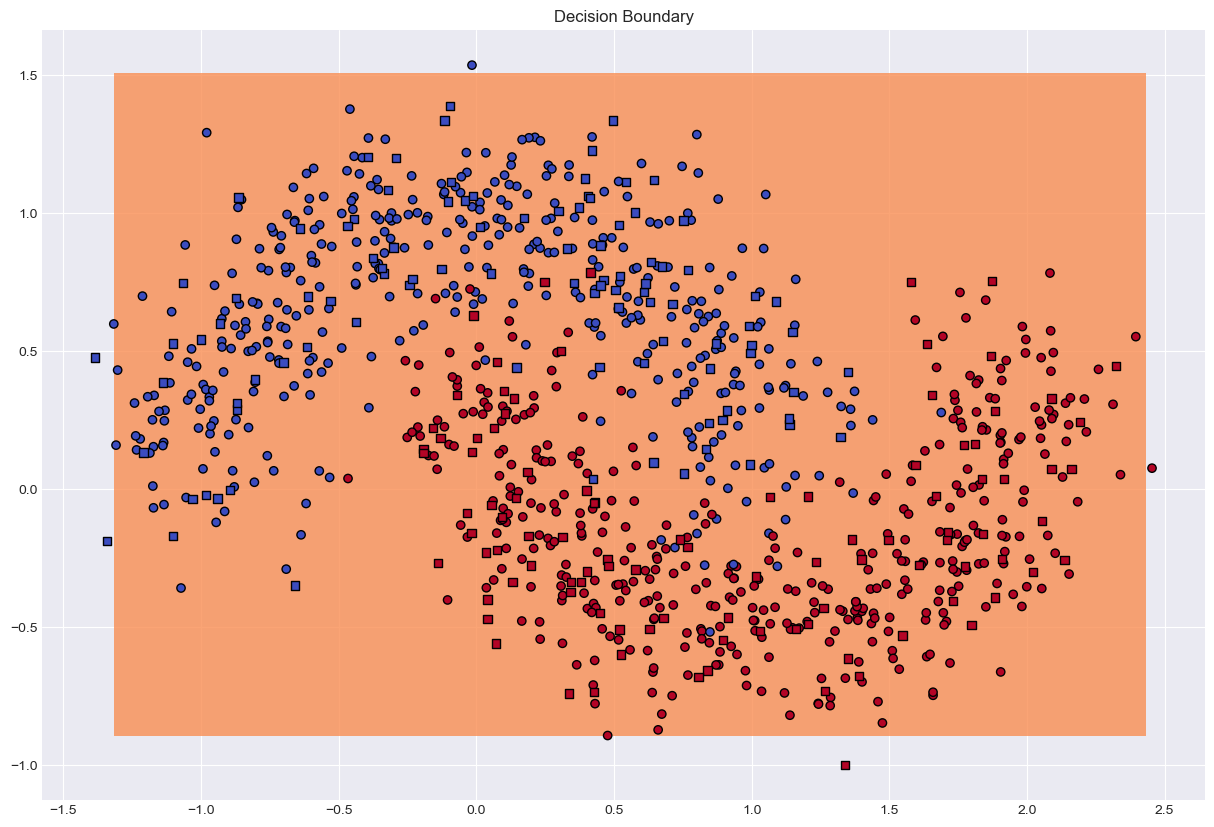

In [23]:
plot_decision_boundary(
    model, 
    X_train,
    X_test,
    y_train.argmax(axis=1),
    y_test.argmax(axis=1),
)
